In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy
from patsy.contrasts import Treatment, Sum
from plotnine import *

In [227]:
df = pd.read_csv("~/income.csv")

## Q A

In [6]:
group_contrast = Treatment(reference = "A").code_without_intercept(['A','B'])
lm_smf_res = smf.ols('income ~jobexp  +\
                C( group, group_contrast) + \
                C( group, group_contrast):jobexp',data = df ).fit()
lm_smf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     68.11
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           6.75e-37
Time:                        12:36:09   Log-Likelihood:                -1719.9
No. Observations:                 500   AIC:                             3448.
Df Residuals:                     496   BIC:                             3465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               18.2853      1.734     10.542      0.000      14.877      21.693
C(group, group_contrast)[T.B]            5.8744      2.097      2.801      0.005       1.754       9.995
jobexp                                   0.0451      0.139      0.323      0.746      -0.229       0.319
C(group, group_contrast)[T.B]:jobexp     0.3720      0.160      2.321      0.021       0.057       0.687
==============================================================================
Omnibus:                       29.966   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.289
Skew:                           0.636   Prob(JB):                     3.58e-08
Kurtosis:                       2.838   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
df

,income,educ,jobexp,group
0,5.0,2,9,A
1,9.7,4,18,A
2,28.4,8,21,B
3,8.8,8,12,A
4,21.0,8,14,A
...,...,...,...,...
495,48.3,21,17,B
496,48.3,21,17,B
497,48.3,21,17,B
498,48.3,21,17,B


## QA A&B

In [8]:
df_aa = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group": "A" })
df_ab = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group": "B" })

In [9]:
df_aa["income"] =  lm_smf_res.predict(df_aa)
df_ab["income"] =  lm_smf_res.predict(df_ab)


## QA C

In [10]:
df_ac = pd.concat([df_aa,df_ab])

In [11]:
df_ac

,jobexp,group,income
0,1.0,A,18.330379
1,1.5,A,18.352909
2,2.0,A,18.375440
3,2.5,A,18.397970
4,3.0,A,18.420501
...,...,...,...
36,19.0,B,32.083486
37,19.5,B,32.292005
38,20.0,B,32.500524
39,20.5,B,32.709043


In [12]:
df_a_result = df_aa.merge(df_ab, on = "jobexp")
df_a_result = df_a_result.drop(["group_x","group_y"],axis = 1)
df_a_result["predict income B - A"] =df_a_result.income_y - df_a_result.income_x

In [13]:
df_a_result.columns = ["jobexp","predicted income A","predicted income B","predict income B - A" ]

In [14]:
df_a_result.to_csv("~/a_result.csv")

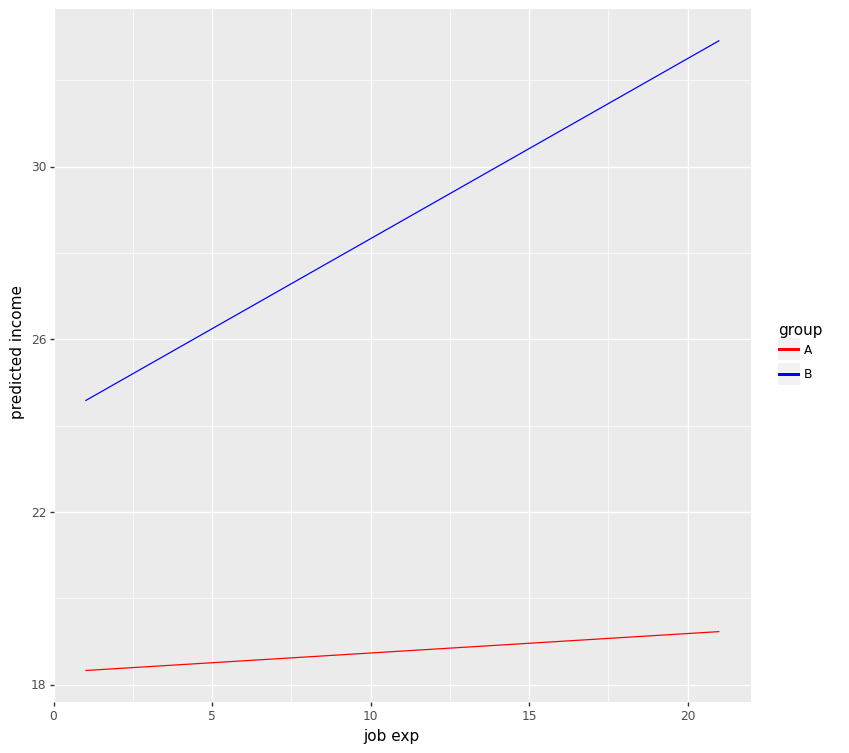

<ggplot: (2978473485174)>

In [15]:
df_ac = pd.concat([df_aa,df_ab])
ggplot(df_ac,aes(x = df_ac.jobexp, y = df_ac.income, color = df_ac.group)) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})

## Q B

In [3]:
df = pd.read_csv("~/income.csv")

In [16]:
df = df.drop("educ",axis = 1)

Since sklearn cannot handle string variable, convert the group variable into whether the student is in group A

In [17]:
df["group_A"] = [x == "A" for x in df.group]

In [18]:
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2, max_leaf_nodes = 10).fit(df[["jobexp","group_A"]],df[["income"]])

In [19]:
df

,income,jobexp,group,group_A
0,5.0,9,A,True
1,9.7,18,A,True
2,28.4,21,B,False
3,8.8,12,A,True
4,21.0,14,A,True
...,...,...,...,...
495,48.3,17,B,False
496,48.3,17,B,False
497,48.3,17,B,False
498,48.3,17,B,False


### Q B.A

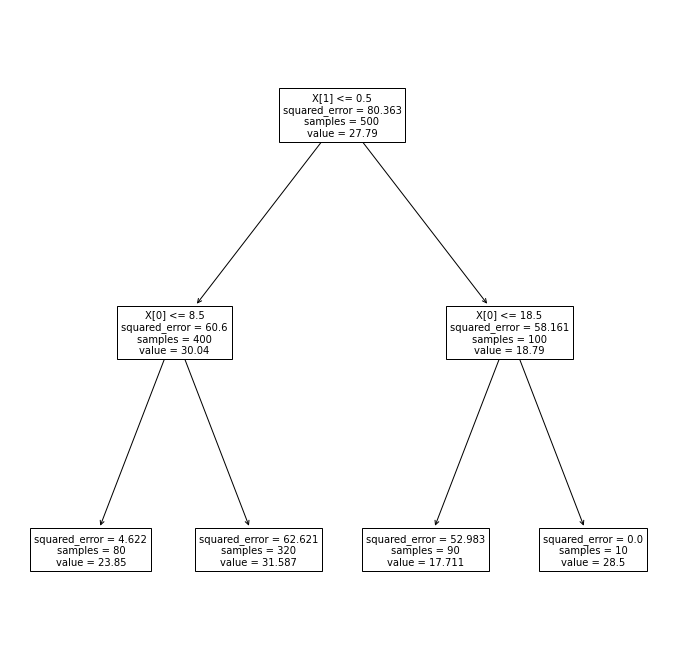

In [20]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(tree,fontsize=10)
plt.show()

In [21]:
tree

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=10)

### QB.B


In [22]:
np.arange(1.0,21.5,0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ])

In [23]:
df_bb = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group_A": True })

In [24]:
income_pred_bb = tree.predict(df_bb)

In [25]:
income_pred_bb

array([17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 17.71111111, 17.71111111, 17.71111111, 17.71111111,
       17.71111111, 28.5       , 28.5       , 28.5       , 28.5       ,
       28.5       ])

### QB.C

In [26]:
df_bc = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group_A": False })
income_pred_bc = tree.predict(df_bc)

In [27]:
income_pred_bc

array([23.85  , 23.85  , 23.85  , 23.85  , 23.85  , 23.85  , 23.85  ,
       23.85  , 23.85  , 23.85  , 23.85  , 23.85  , 23.85  , 23.85  ,
       23.85  , 23.85  , 31.5875, 31.5875, 31.5875, 31.5875, 31.5875,
       31.5875, 31.5875, 31.5875, 31.5875, 31.5875, 31.5875, 31.5875,
       31.5875, 31.5875, 31.5875, 31.5875, 31.5875, 31.5875, 31.5875,
       31.5875, 31.5875, 31.5875, 31.5875, 31.5875, 31.5875])

### QB.D

In [28]:
df_bb["income"] = income_pred_bb
df_bc["income"] = income_pred_bc

In [29]:
df_b_result = df_bb.merge(df_bc, on = "jobexp")
df_b_result = df_b_result.drop(["group_A_x","group_A_y"],axis = 1)
df_b_result["predict income B - A"] =df_b_result.income_y - df_b_result.income_x

In [30]:
df_b_result.columns = ["jobexp","predicted income A","predicted income B","predict income B - A" ]

In [236]:
df_b_result.to_csv("~/b.result.csv")

In [31]:
df_bd = pd.concat([df_bb,df_bc],axis = 0)

In [32]:
df_bd["group"] = ["A" if x else "B" for x in df_bd.group_A]

In [33]:
df_bd

,jobexp,group_A,income,group
0,1.0,True,17.711111,A
1,1.5,True,17.711111,A
2,2.0,True,17.711111,A
3,2.5,True,17.711111,A
4,3.0,True,17.711111,A
...,...,...,...,...
36,19.0,False,31.587500,B
37,19.5,False,31.587500,B
38,20.0,False,31.587500,B
39,20.5,False,31.587500,B


In [34]:
#for this two tree, we calculate the sum error, and then the R-square to compare them
ESS = np.sum((df['income'] - tree.predict(df[['jobexp','group_A']]))**2)


In [35]:
ESS

25177.038888888877

In [36]:
TSS = np.sum((df['income'] - np.mean(df['income']))**2)
#Calculate the Rsquare in order to compare two models
Rsquare = 1 - ESS/TSS

In [37]:
Rsquare

0.3734132489932772

/home/hs3163/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


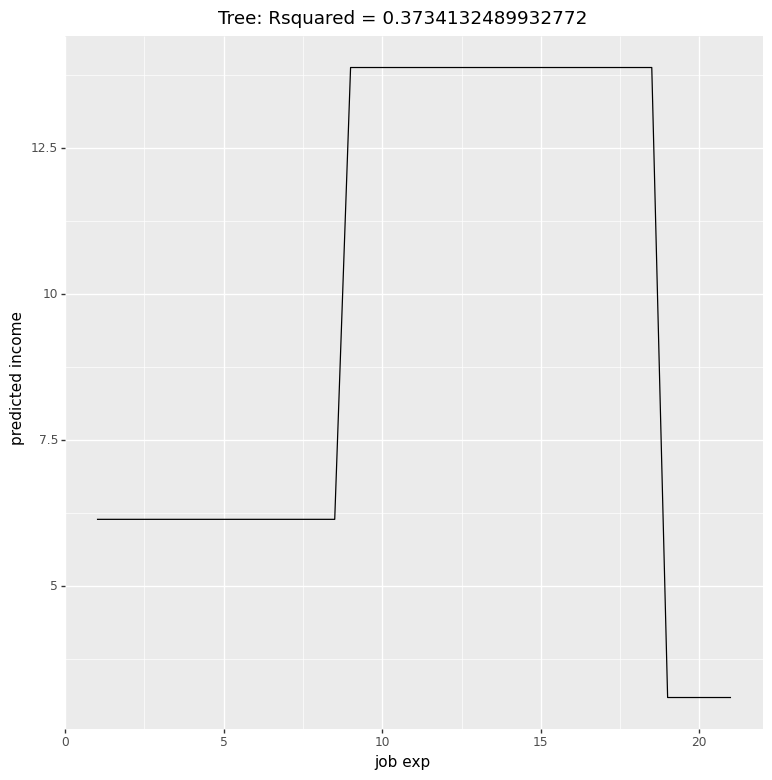

<ggplot: (2978473641602)>

In [42]:

ggplot(df_b_result,aes(x = df_b_result.jobexp, y = df_b_result["predict income B - A"])) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'Tree: Rsquared = {Rsquare}')

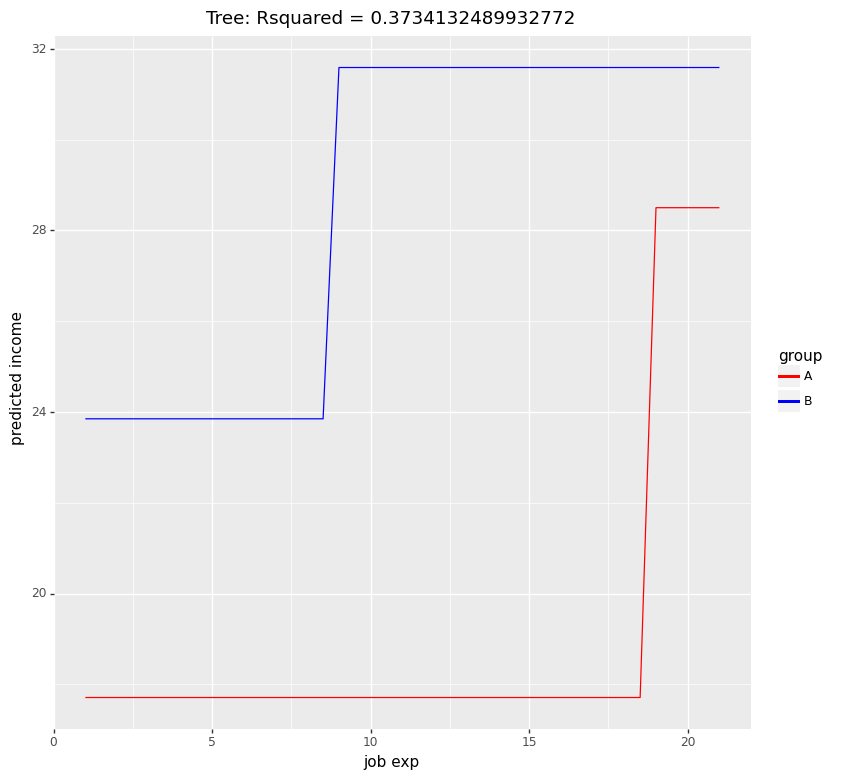

<ggplot: (2978473527221)>

In [38]:
ggplot(df_bd,aes(x = df_bd.jobexp, y = df_bd.income, color = df_bd.group)) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'Tree: Rsquared = {Rsquare}')

## QC

In [606]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as img

In [607]:
from sklearn import preprocessing


In [613]:
scaler = preprocessing.StandardScaler()

In [614]:
scaler.fit(df[["jobexp","group_A"]])

StandardScaler()

In [618]:
df_scale.shape

(500, 2)

In [619]:
df_scale = scaler.transform(df[["jobexp","group_A"]])

In [623]:
knn_clf = KNeighborsRegressor(12).fit(df_scale, df["income"].values)
y_pred = knn_clf.predict(df_scale)
ESS = np.sum((df["income"].values - y_pred)**2)
TSS = np.sum((df["income"].values - np.mean(df["income"].values))**2)
RsquareKNN = 1 - ESS/TSS
RsquareKNN

0.3234312058208465

0.4246880359548292

## QC c

In [631]:
df_ca = scaler.transform(df_bb[["jobexp","group_A"]])
df_cb = scaler.transform(df_bc[["jobexp","group_A"]])

In [627]:
df_bb["income"] = y_pred_ca = knn_clf.predict(df_ca)
df_bc["income"] = y_pred_cb = knn_clf.predict(df_cb)

In [628]:
df_c_result = df_bb.merge(df_bc, on = "jobexp")
df_c_result = df_c_result.drop(["group_A_x","group_A_y"],axis = 1)
df_c_result["predict income B - A"] =df_c_result.income_y - df_c_result.income_x

/home/hs3163/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


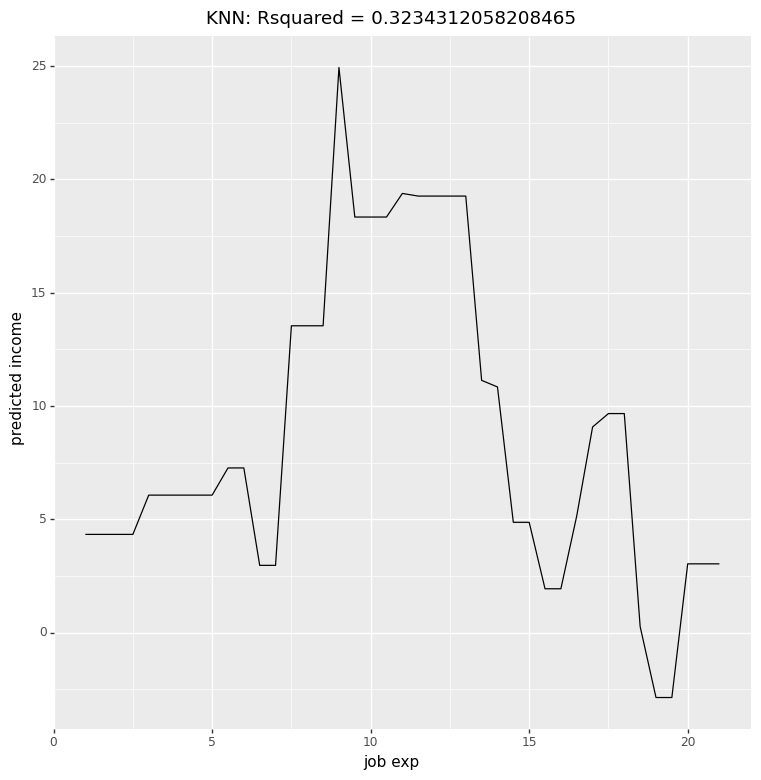

<ggplot: (2978476858022)>

In [630]:
ggplot(df_c_result,aes(x = df_c_result.jobexp, y = df_c_result["predict income B - A"])) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'KNN: Rsquared = {RsquareKNN}')

NameError: name 'df_cb_minmax' is not defined

# 7

In [228]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy
from patsy.contrasts import Treatment, Sum
from plotnine import *
df = pd.read_csv("~/income.csv")

## Q A

In [510]:
group_contrast = Treatment(reference = "B").code_without_intercept(['A','B'])
lm_smf_res = smf.ols('income ~educ + jobexp  +\
                C( group, group_contrast) + \
                C( group, group_contrast):jobexp',data = df ).fit()
lm_smf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     604.4
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          6.64e-189
Time:                        17:04:35   Log-Likelihood:                -1363.1
No. Observations:                 500   AIC:                             2736.
Df Residuals:                     495   BIC:                             2757.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -5.5141      0.946     -5.826      0.000      -7.374      -3.655
C(group, group_contrast)[T.A]            0.4687      1.041      0.450      0.653      -1.576       2.513
educ                                     1.8348      0.046     39.595      0.000       1.744       1.926
jobexp                                   0.7128      0.040     18.033      0.000       0.635       0.790
C(group, group_contrast)[T.A]:jobexp    -0.2556      0.079     -3.251      0.001      -0.410      -0.101
==============================================================================
Omnibus:                       61.592   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.606
Skew:                          -0.989   Prob(JB):                     1.15e-18
Kurtosis:                       2.771   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
df

,income,educ,jobexp,group,group_A
0,5.0,2,9,A,True
1,9.7,4,18,A,True
2,28.4,8,21,B,False
3,8.8,8,12,A,True
4,21.0,8,14,A,True
...,...,...,...,...,...
495,48.3,21,17,B,False
496,48.3,21,17,B,False
497,48.3,21,17,B,False
498,48.3,21,17,B,False


## QA A&B

In [512]:
df_aa = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group": "A", "educ" : 18 })
df_ab = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group": "B", "educ" : 18 })

In [513]:
df_aa["income"] =  lm_smf_res.predict(df_aa)
df_ab["income"] =  lm_smf_res.predict(df_ab)


## QA C

In [ ]:
df_a_result = df_aa.merge(df_ab, on = "jobexp")
df_a_result = df_a_result.drop(["group_x","group_y"],axis = 1)
df_a_result["predict income B - A"] =df_a_result.income_y - df_a_result.income_x

In [269]:
df_a_result = df_aa.merge(df_ab, on = "jobexp")
df_a_result = df_a_result.drop(["group_x","group_y","educ_x","educ_y"],axis = 1)
df_a_result["predict income B - A"] =df_a_result.income_y - df_a_result.income_x

In [270]:
df_a_result

,jobexp,income_x,income_y,predict income B - A
0,1.0,28.437787,28.224713,-0.213075
1,1.5,28.666389,28.581120,-0.085269
2,2.0,28.894990,28.937527,0.042537
3,2.5,29.123591,29.293935,0.170343
4,3.0,29.352193,29.650342,0.298149
5,3.5,29.580794,30.006749,0.425955
6,4.0,29.809396,30.363156,0.553761
7,4.5,30.037997,30.719564,0.681567
8,5.0,30.266599,31.075971,0.809372
9,5.5,30.495200,31.432378,0.937178


In [271]:
df_a_result.columns = ["jobexp","predicted income A","predicted income B","predict income B - A" ]

In [14]:
df_a_result.to_csv("~/a_result.csv")

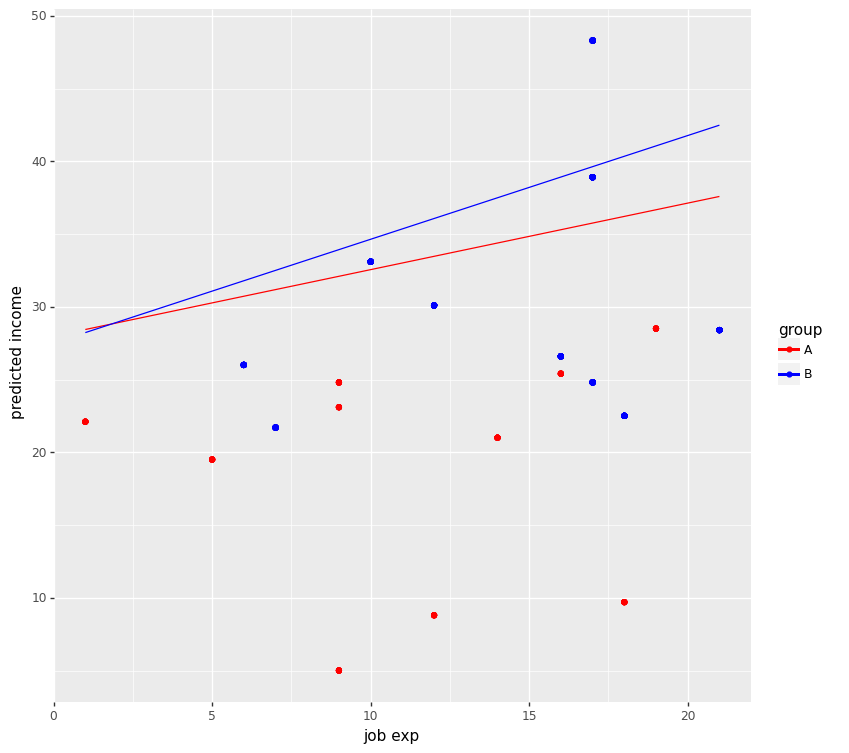

<ggplot: (2978477690356)>

In [505]:
df_ac = pd.concat([df_aa,df_ab])
ggplot(df_ac,aes(x = df_ac.jobexp, y = df_ac.income, color = df_ac.group)) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"}) +geom_point( df , aes(x = df.jobexp, y = df.income, color = df.group ))



/home/hs3163/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


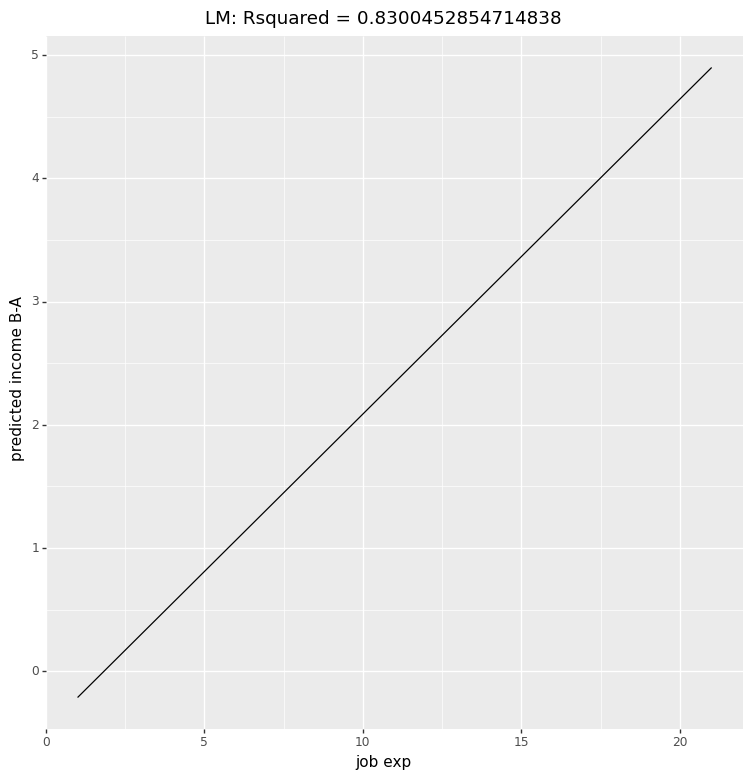

<ggplot: (2978478117413)>

In [273]:
ggplot(df_a_result,aes(x = df_a_result.jobexp, y = df_a_result["predict income B - A"])) + geom_line()+\
  xlab('job exp') + ylab('predicted income B-A')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'LM: Rsquared = {lm_smf_res.rsquared}')

## Q B

Since sklearn cannot handle string variable, convert the group variable into whether the student is in group A

In [241]:
df["group_A"] = [x == "A" for x in df.group]

In [246]:
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2, max_leaf_nodes = 10).fit(df[["educ","jobexp","group_A"]],df[["income"]])

In [244]:
df

,income,educ,jobexp,group,group_A
0,5.0,2,9,A,True
1,9.7,4,18,A,True
2,28.4,8,21,B,False
3,8.8,8,12,A,True
4,21.0,8,14,A,True
...,...,...,...,...,...
495,48.3,21,17,B,False
496,48.3,21,17,B,False
497,48.3,21,17,B,False
498,48.3,21,17,B,False


### Q B.A

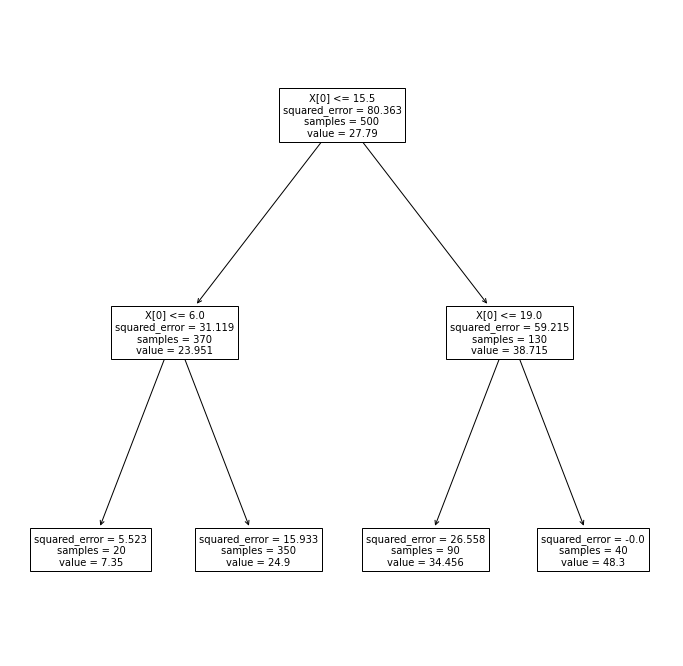

In [247]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(tree,fontsize=10)
plt.show()

In [248]:
tree

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=10)

### QB.B


In [249]:
df_bb = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group_A": True,"educ" : 18 })

In [250]:
income_pred_bb = tree.predict(df_bb)

/home/hs3163/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



In [251]:
income_pred_bb

array([ 7.35      ,  7.35      ,  7.35      ,  7.35      ,  7.35      ,
        7.35      ,  7.35      ,  7.35      ,  7.35      ,  7.35      ,
        7.35      , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       34.45555556, 34.45555556, 34.45555556, 34.45555556, 34.45555556,
       34.45555556, 34.45555556, 48.3       , 48.3       , 48.3       ,
       48.3       ])

### QB.C

In [252]:
df_bc = pd.DataFrame({ "jobexp": np.arange(1.0,21.5,0.5) ,"group_A": False,"educ" : 18 })
income_pred_bc = tree.predict(df_bc)

/home/hs3163/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



In [253]:
income_pred_bc

array([ 7.35      ,  7.35      ,  7.35      ,  7.35      ,  7.35      ,
        7.35      ,  7.35      ,  7.35      ,  7.35      ,  7.35      ,
        7.35      , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       24.9       , 24.9       , 24.9       , 24.9       , 24.9       ,
       34.45555556, 34.45555556, 34.45555556, 34.45555556, 34.45555556,
       34.45555556, 34.45555556, 48.3       , 48.3       , 48.3       ,
       48.3       ])

### QB.D

In [254]:
df_bb["income"] = income_pred_bb
df_bc["income"] = income_pred_bc

In [274]:
df_b_result = df_bb.merge(df_bc, on = "jobexp")
df_b_result = df_b_result.drop(["group_A_x","group_A_y","educ_x","educ_y"],axis = 1)
df_b_result["predict income B - A"] =df_b_result.income_y - df_b_result.income_x

In [275]:
df_b_result

,jobexp,income_x,income_y,predict income B - A
0,1.0,7.350000,7.350000,0.0
1,1.5,7.350000,7.350000,0.0
2,2.0,7.350000,7.350000,0.0
3,2.5,7.350000,7.350000,0.0
4,3.0,7.350000,7.350000,0.0
5,3.5,7.350000,7.350000,0.0
6,4.0,7.350000,7.350000,0.0
7,4.5,7.350000,7.350000,0.0
8,5.0,7.350000,7.350000,0.0
9,5.5,7.350000,7.350000,0.0


In [276]:
df_b_result.columns = ["jobexp","predicted income A","predicted income B","predict income B - A" ]

In [236]:
df_b_result.to_csv("~/b.result.csv")

In [277]:
df_bd = pd.concat([df_bb,df_bc],axis = 0)

In [279]:
#for this two tree, we calculate the sum error, and then the R-square to compare them
ESS = np.sum((df['income'] - tree.predict(df[['educ','jobexp','group_A']]))**2)


In [280]:
ESS

8077.072222222221

In [281]:
TSS = np.sum((df['income'] - np.mean(df['income']))**2)
#Calculate the Rsquare in order to compare two models
Rsquare = 1 - ESS/TSS

In [282]:
Rsquare

0.7989840479770485

/home/hs3163/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


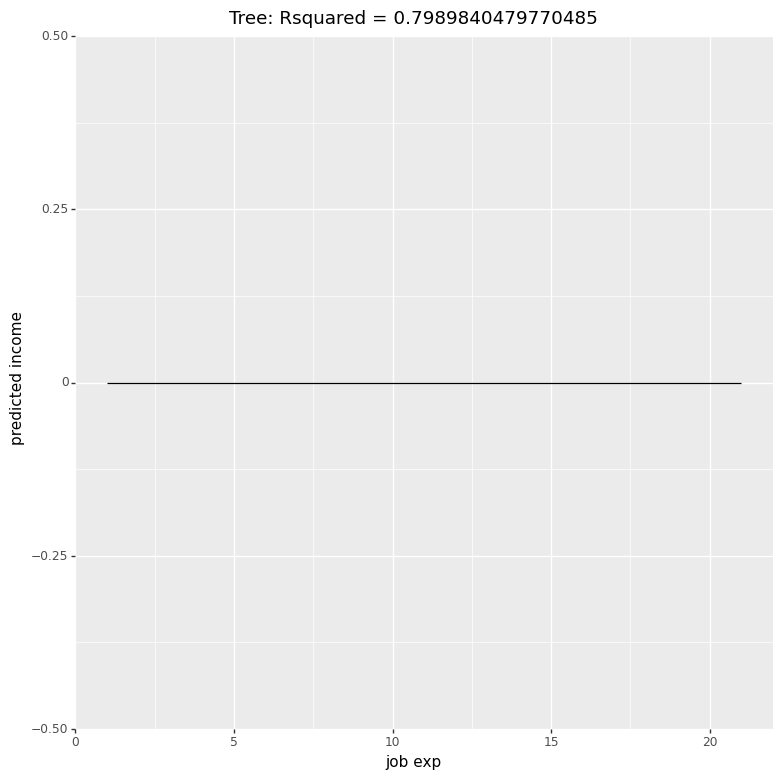

<ggplot: (2978475983713)>

In [283]:

ggplot(df_b_result,aes(x = df_b_result.jobexp, y = df_b_result["predict income B - A"])) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'Tree: Rsquared = {Rsquare}')

## QC

In [565]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as img

In [566]:
from sklearn import preprocessing


In [567]:
scaler = preprocessing.StandardScaler()

In [591]:
scaler.fit(df[["educ","jobexp","group_A"]])

StandardScaler()

In [569]:
df_scale.shape

(500, 3)

In [592]:
df_scale = scaler.transform(df[["educ","jobexp","group_A"]])

In [605]:
knn_clf = KNeighborsRegressor(43).fit(df_scale, df["income"].values)
y_pred = knn_clf.predict(df_scale)
ESS = np.sum((df["income"].values - y_pred)**2)
TSS = np.sum((df["income"].values - np.mean(df["income"].values))**2)
RsquareKNN = 1 - ESS/TSS
RsquareKNN

0.9289614835965445

In [604]:
a,b = scipy.stats.pearsonr(df["income"],y_pred)
a**2

0.9318789345835212

## QC c

In [576]:
df_ca = scaler.transform(df_bb[["educ","jobexp","group_A"]])
df_cb = scaler.transform(df_bc[["educ","jobexp","group_A"]])


In [577]:
df_bb["income"] = y_pred_ca = knn_clf.predict(df_ca)
df_bc["income"] = y_pred_cb = knn_clf.predict(df_cb)

In [578]:
df_c_result = df_bb.merge(df_bc, on = "jobexp")
df_c_result = df_c_result.drop(["group_A_x","group_A_y","educ_x","educ_y"],axis = 1)
df_c_result["predict income B - A"] =df_c_result.income_y - df_c_result.income_x

/home/hs3163/miniconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


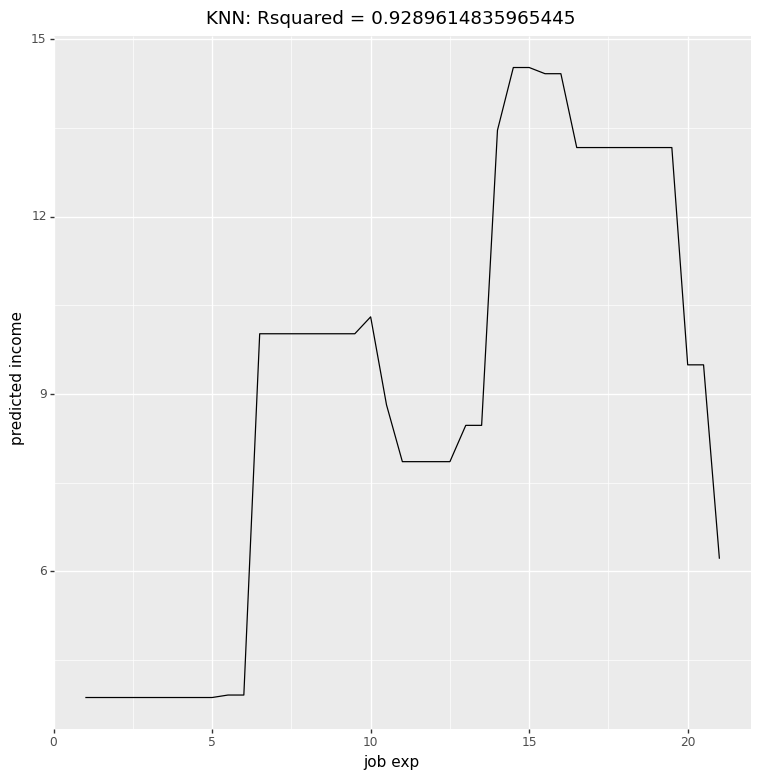

<ggplot: (2978476953360)>

In [579]:
ggplot(df_c_result,aes(x = df_c_result.jobexp, y = df_c_result["predict income B - A"])) + geom_line()+\
  xlab('job exp') + ylab('predicted income')+theme(figure_size = (9, 9))+scale_colour_manual({"A":"red","B":"blue"})+ggtitle(f'KNN: Rsquared = {RsquareKNN}')

0.9318789345835212